In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#Librería para modelado
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
import pandas as pd 
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')

In [35]:
dataset_train.head(15)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [11]:
training_set = dataset_train.iloc[:, 1:2].values

In [12]:
# Escalado de Categorias

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
# Creando Estructura de Datos con 60 Pasos y 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
# Remodelacion
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
# Iniciando RNR
regressor = Sequential()


In [16]:
# Primera capa LSTM y Regularizacion de Dropout
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Segunda capa LSTM y Regularizacion de Dropout
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Tercera capa LSTM y Regularizacion de Dropout
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Cuarta capa LSTM y Regularizacion de Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Capa Output / Salida
regressor.add(Dense(units = 1))

In [17]:
# Compilando RNR
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Encajando Red Neuronal En Set de Entrenamiento
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 90ms/step - loss: 0.0374
Epoch 2/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0066
Epoch 4/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0039
Epoch 12/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0044
Epoch 13/100
38/38 [=====

In [27]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [31]:
dataset_test = pd.read_csv(io.StringIO(uploaded['Google_Stock_Price_Test.csv'].decode('utf-8')))
dataset_test.head(4)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"


In [32]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [33]:
# Obteniendo el Precio Predicho
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

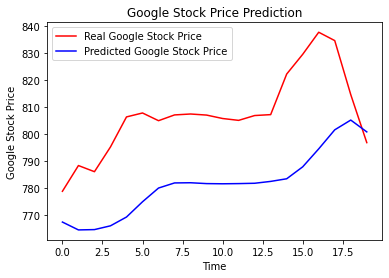

In [34]:
# Visualizando Resultados
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()